In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
df = pd.read_csv(r"D:\Sciebo\TechLabs_AI_Track\Team_11\Data\Cleaning\data_rhein_incl_km.csv")
df["Datum"] = pd.to_datetime(df["Datum"]).dt.date
dfx= df.set_index(["Datum"])

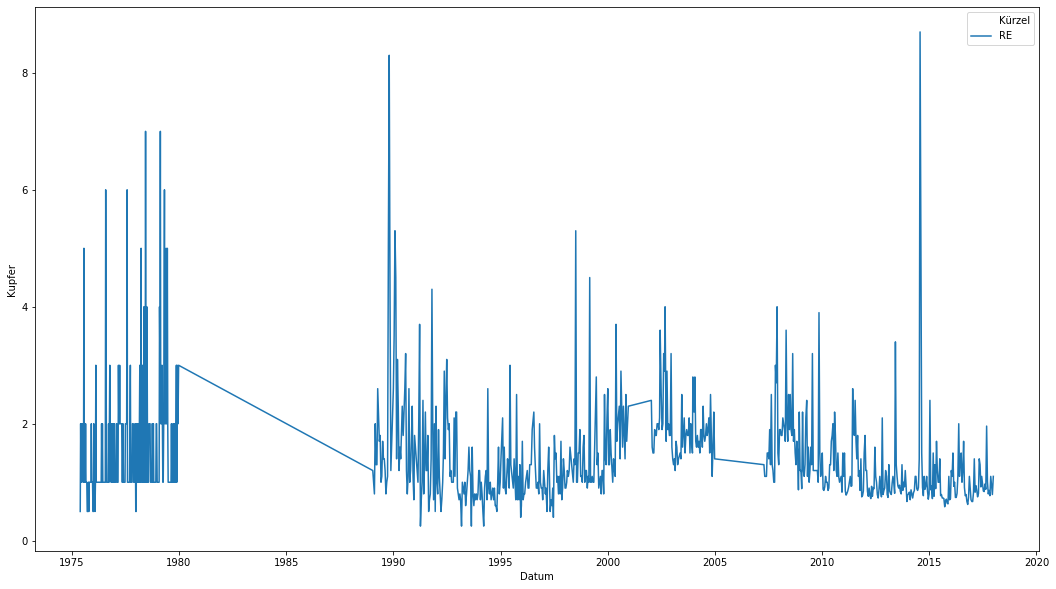

In [64]:
dfRE=df.loc[df['Kürzel'] == "RE"]
dfcu = dfRE[dfRE['Kupfer'].notna()]

plt.figure(figsize=(18,10))
sns.lineplot(x="Datum", y="Kupfer",hue="Kürzel", data=dfcu)
#plt.xticks(rotation=70)

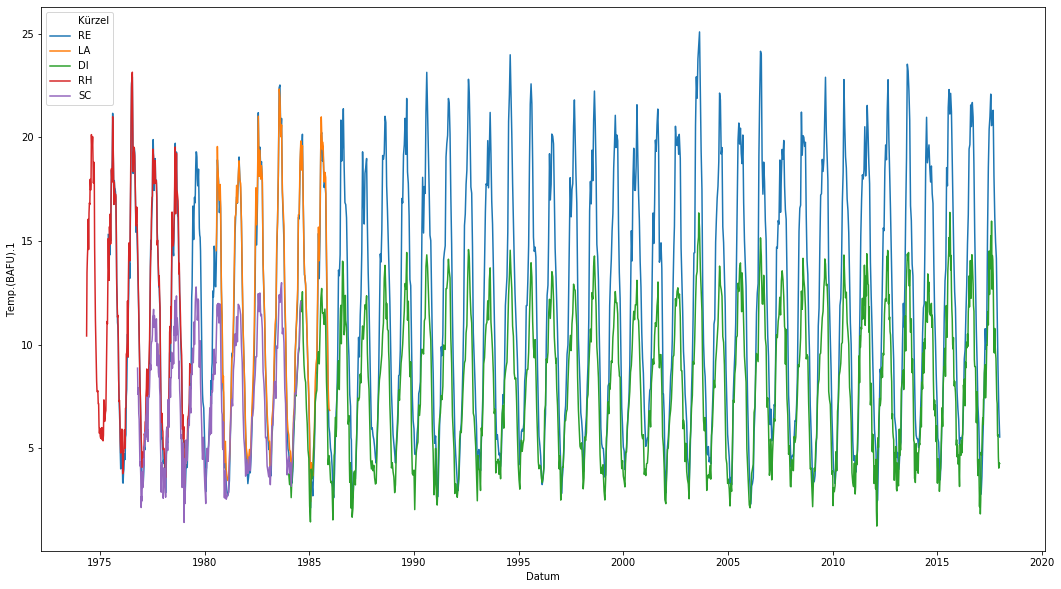

In [65]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Datum", y="Temp.(BAFU).1",hue="Kürzel", data=df)

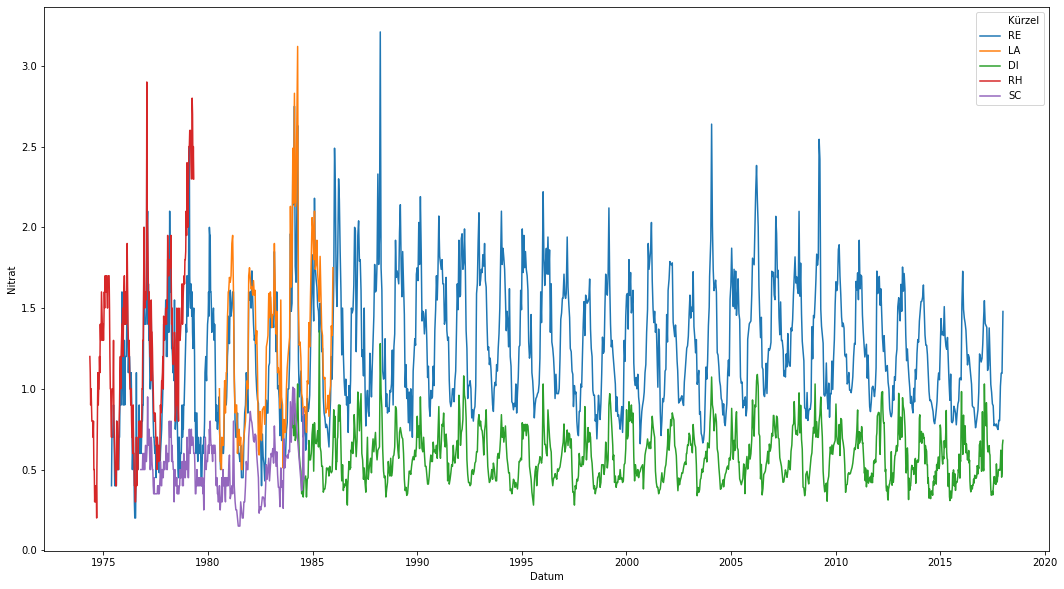

In [66]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Datum", y="Nitrat",hue="Kürzel", data=df)

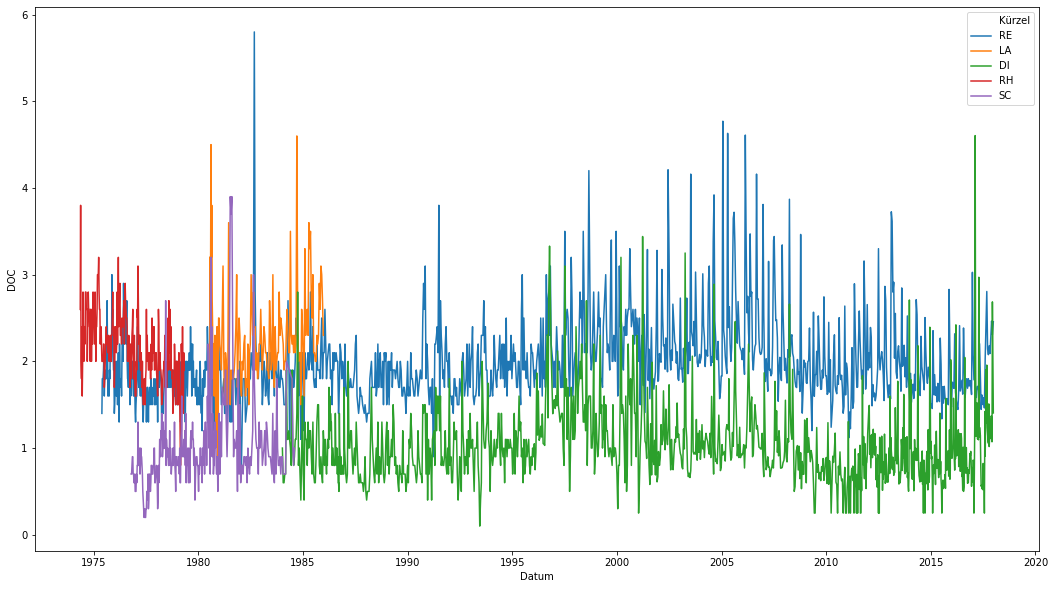

In [68]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Datum", y="DOC",hue="Kürzel", data=df)

__________

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from dateutil.parser import parse
from pylab import rcParams

In [79]:
df1 = dfx[["Temp.(BAFU).1"]]
ts_log = np.log(df1)
#ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)# Remove all the NaN values
ts_log.dropna(inplace=True)

C:\Users\raiko\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


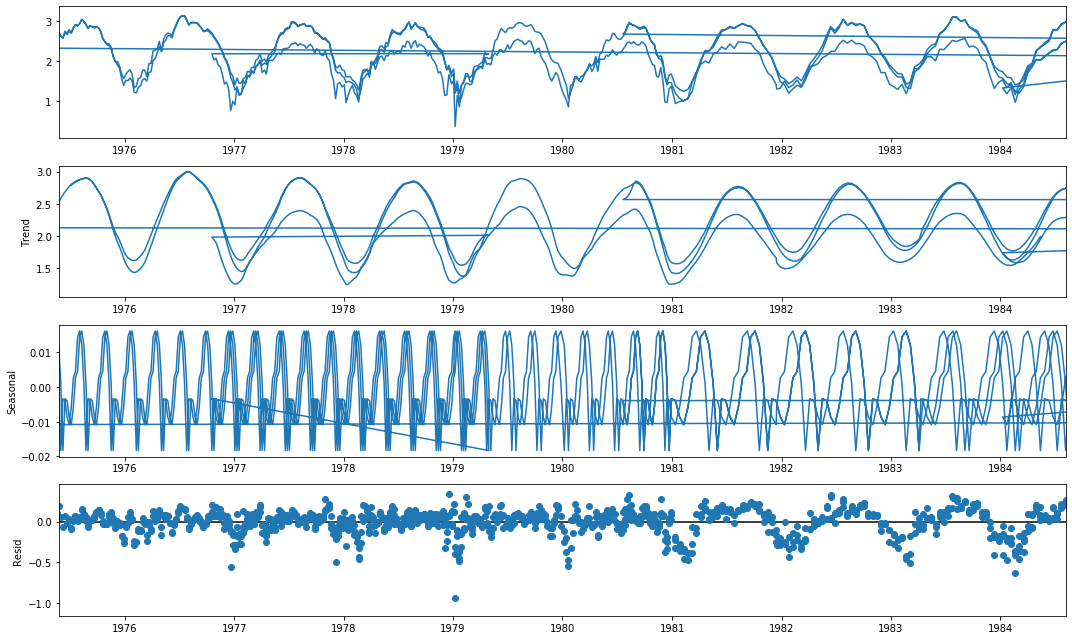

In [80]:
rcParams['figure.figsize'] = 15, 9
result = seasonal_decompose(ts_log, model='additive', freq=12)
fig = result.plot()
plt.show()